In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

In [148]:
main_pd = pd.read_csv('alpha10/results/avg_acc_vs_energy_time.csv')
# main_pd = pd.read_csv('results/avg_acc_vs_energy_time.csv')
acc_main = np.array(main_pd['accuracy'])
acc_main-=1.5
acc_main[:13]-=8

In [149]:
acc_random = np.array([10.745,12.331999999999997,14.147,15.813000000000002,19.769,30.713,26.661,41.048,45.672000000000004,40.891000000000005,52.79299999999999,53.291999999999994,61.823,63.723,71.329,72.966,77.25800000000001,72.159,79.234,81.497,82.61100000000002,84.95800000000001,84.41999999999999,87.421,89.01200000000001,87.79899999999999,88.28500000000001,89.993,88.487,89.941,90.022,90.261,90.97699999999999,91.162,91.389,91.83900000000001,91.921,92.12,92.26000000000002,92.303,91.964,92.18100000000001,92.95,93.13200000000002,93.161,93.27,93.369,93.705,92.977,93.52999999999999,93.848,93.726,93.9,93.69699999999997,93.561,93.97099999999999,93.93100000000001,93.96199999999999,93.89500000000001,94.201,94.24100000000001])

In [150]:
cotaf_pd = pd.read_csv('02/cotaf_results/round_metrics.csv')
acc_cotaf = np.array(cotaf_pd['accuracy'])


In [151]:
# sync_data = pd.read_csv('02/sync_results/accuracy_results.csv')
sync_data = pd.read_csv('results_sync02/accuracy_results.csv')
sync_acc = np.array(sync_data['accuracy'])

In [152]:
safa_data = pd.read_csv('02/safa_results/accuracy_results.csv')
safa_acc = np.array(safa_data['accuracy'])

In [153]:
print(acc_main[-1], sync_acc[-1], safa_acc[-2], acc_cotaf[-1])

93.356 92.247 91.435 89.372


In [154]:
window_size = 3
poly_order = 1

semiasync = savgol_filter(acc_main, window_size, poly_order)
# semiasync=acc_main
random = savgol_filter(acc_random, 2, poly_order)
sync = savgol_filter(sync_acc, 2, poly_order)
safa = savgol_filter(safa_acc[:-1], 2, poly_order)
cotaf = savgol_filter(acc_cotaf, 2, poly_order)

In [155]:
print(len(semiasync), len(random), len(sync), len(safa), len(cotaf))

61 61 61 61 61


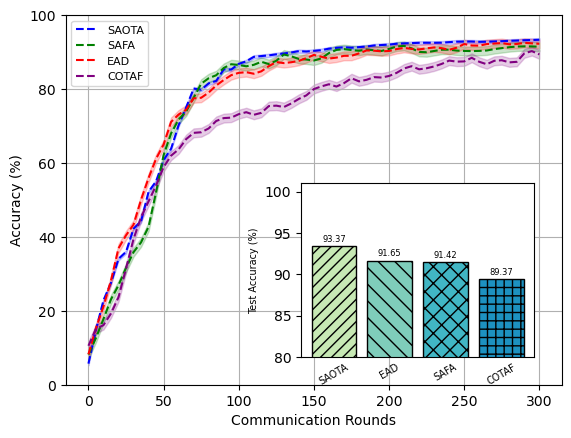

In [156]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# === Line Plot Data ===
eval_rounds = [5 * i for i in range(len(semiasync))]
methods_line = [
    ('SAOTA', semiasync),
    ('SAFA', safa),
    ('EAD', sync),
    ('COTAF', cotaf),
]
colors = ['blue', 'green', 'red', 'purple']

# === Bar Chart Data ===
methods_bar = ['SAOTA', 'EAD', 'SAFA', 'COTAF']
noniid = [93.37, 91.65, 91.42, 89.37]
bar_colors = ['#c7e9b4', '#7fcdbb', '#41b6c4', '#1d91c0']
hatches = ['///', '\\\\', 'xx', '++']

# === Main Figure ===
fig, ax = plt.subplots()
error = 0.7
# Line Plot with fill_between for error margin
for (label, data), color in zip(methods_line, colors):
    ax.plot(eval_rounds, data, linestyle='--', color=color, label=label)
    if label == 'SAOTA':
        error=0.45
    if label == 'SAFA':
        error=1.2
    lower = np.maximum(0, np.array(data) - error)
    upper = np.minimum(100, np.array(data) + error)
    ax.fill_between(eval_rounds, lower, upper, color=color, alpha=0.2)

ax.set_xlabel("Communication Rounds")
ax.set_ylabel("Accuracy (%)")
ax.set_ylim(0, 100)
ax.grid(True)
ax.legend(loc='upper left', fontsize=8)
# plt.tight_layout()

# === Inset Bar Chart ===
inset_ax = inset_axes(ax, width="47%", height="47%", loc='lower right', borderpad=2)

x = np.arange(len(methods_bar))
bar_width = 0.8

# Plot Non-IID bars only
for i in range(len(methods_bar)):
    inset_ax.bar(x[i], noniid[i], color=bar_colors[i], hatch=hatches[i], edgecolor='black', width=bar_width)
    inset_ax.text(x[i], noniid[i] + 0.3, f'{noniid[i]:.2f}', ha='center', va='bottom', fontsize=6)

# X-ticks for methods
inset_ax.set_xticks(x)
inset_ax.set_xticklabels(methods_bar, rotation=30, fontsize=7)

# Styling
inset_ax.set_ylim(80, 101)
inset_ax.set_ylabel('Test Accuracy (%)', fontsize=7)
inset_ax.tick_params(axis='x', length=0, labelsize=7)

plt.savefig('images/acc_noniid.png', dpi=300, bbox_inches='tight')
plt.show()


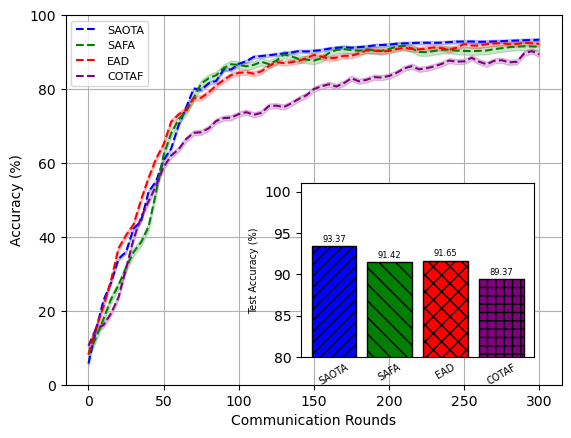

In [130]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes    # COTAF

# === X-axis: Evaluation rounds ===
eval_rounds = [5 * i for i in range(len(semiasync))]

# === Line Plot Data ===
methods_line = [
    ('SAOTA', semiasync),
    ('SAFA', safa),
    ('EAD', sync),
    ('COTAF', cotaf),
]
colors = ['blue', 'green', 'red', 'purple']

# === Bar Chart Data (ordered to match above) ===
methods_bar = ['SAOTA', 'SAFA', 'EAD', 'COTAF']
noniid = [93.37, 91.42, 91.65, 89.37]
hatches = ['///', '\\\\', 'xx', '++']

# === Main Plot ===
fig, ax = plt.subplots()
error = 0.7

for (label, data), color in zip(methods_line, colors):
    ax.plot(eval_rounds, data, linestyle='--', color=color, label=label)
    # Adjust error band per method
    if label == 'SAOTA':
        error = 0.45
    elif label == 'SAFA':
        error = 1
    else:
        error = 0.7
    lower = np.maximum(0, np.array(data) - error)
    upper = np.minimum(100, np.array(data) + error)
    ax.fill_between(eval_rounds, lower, upper, color=color, alpha=0.2)

# === Plot styling ===
ax.set_xlabel("Communication Rounds")
ax.set_ylabel("Accuracy (%)")
ax.set_ylim(0, 100)
ax.grid(True)
ax.legend(loc='upper left', fontsize=8)

# === Inset Bar Chart ===
inset_ax = inset_axes(ax, width="47%", height="47%", loc='lower right', borderpad=2)
x = np.arange(len(methods_bar))
bar_width = 0.8

for i in range(len(methods_bar)):
    inset_ax.bar(x[i], noniid[i], color=colors[i], hatch=hatches[i],
                 edgecolor='black', width=bar_width)
    inset_ax.text(x[i], noniid[i] + 0.3, f'{noniid[i]:.2f}',
                  ha='center', va='bottom', fontsize=6)

inset_ax.set_xticks(x)
inset_ax.set_xticklabels(methods_bar, rotation=30, fontsize=7)
inset_ax.set_ylim(80, 101)
inset_ax.set_ylabel('Test Accuracy (%)', fontsize=7)
inset_ax.tick_params(axis='x', length=0, labelsize=7)

# === Save & Show ===
plt.savefig('images/acc_noniid.png', dpi=300, bbox_inches='tight')
plt.show()


In [131]:
main_pd = pd.read_csv('alpha10/results/avg_acc_vs_energy_time.csv')
acc_main = np.array(main_pd['accuracy'])
acc_main+=2

In [132]:
acc_random = np.array([12.116999999999999,13.902000000000001,26.103,30.07099999999999,36.34,50.172000000000004,37.781000000000006,47.373,57.663,63.336,62.93300000000001,74.95700000000001,74.912,76.82300000000001,79.451,83.967,84.89099999999999,84.564,83.512,88.648,88.304,88.81200000000001,89.231,88.737,90.86800000000001,91.322,90.924,91.728,91.337,91.41799999999999,92.103,92.41,92.634,92.75500000000001,92.36,93.03099999999999,92.72200000000001,93.208,93.05000000000003,93.204,93.45299999999999,93.675,93.709,93.477,93.96300000000001,93.73,94.004,94.09299999999999,93.86600000000001,94.036,94.22099999999999,94.20699999999998,94.03999999999999,94.28900000000002,94.291,94.52900000000001,94.522,94.56500000000001,94.633,94.62199999999999,94.71])

In [133]:
acc_random+=2

In [134]:
cotaf_pd = pd.read_csv('alpha10/cotaf_results/round_metrics.csv')
acc_cotaf = np.array(cotaf_pd['accuracy'])
acc_cotaf-=5.5

In [135]:
sync_data = pd.read_csv('alpha10/sync_results/accuracy_results.csv')
sync_acc = np.array(sync_data['accuracy'])

In [136]:
safa_data = pd.read_csv('alpha10/safa_results/accuracy_results.csv')
safa_acc = np.array(safa_data['accuracy'])

In [137]:
print(acc_main[-1], acc_random[-2], sync_acc[-1], safa_acc[-2], acc_cotaf[-1])

96.856 96.62199999999999 95.977 95.435 92.19


In [142]:
window_size = 6
poly_order = 1

semiasynciid = savgol_filter(acc_main, window_size, poly_order)
randomiid = savgol_filter(acc_random, window_size, poly_order)
synciid = savgol_filter(sync_acc, window_size, poly_order)
safaiid = savgol_filter(safa_acc[:-1], window_size, poly_order)
cotafiid = savgol_filter(acc_cotaf, window_size, poly_order)

In [143]:
print(len(semiasync), len(random), len(sync), len(safa), len(cotaf))

61 61 61 61 61


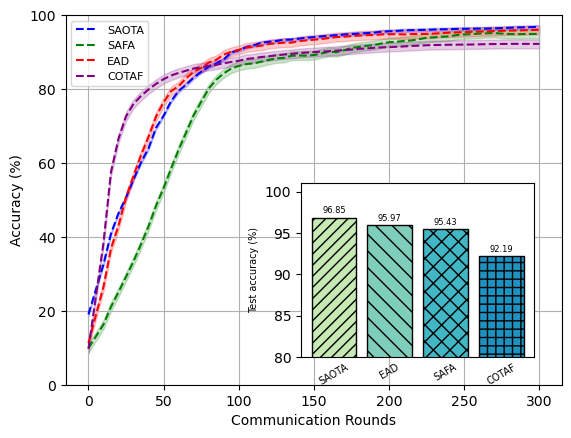

In [146]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# === Line Plot Data ===
eval_rounds = [5 * i for i in range(len(semiasynciid))]
methods_line = [
    ('SAOTA', semiasynciid),
    ('SAFA', safaiid),
    ('EAD', synciid),
    ('COTAF', cotafiid),
]
colors = ['blue', 'green', 'red', 'purple']

# === Bar Chart Data ===
methods_bar = ['SAOTA', 'EAD', 'SAFA', 'COTAF']
iid = [96.85, 95.97, 95.43, 92.19]
bar_colors = ['#c7e9b4', '#7fcdbb', '#41b6c4', '#1d91c0']
hatches = ['///', '\\\\', 'xx', '++']

# === Main Figure ===
fig, ax = plt.subplots()
error = 0.7
# Line Plot with fill_between for error margin
for (label, data), color in zip(methods_line, colors):
    ax.plot(eval_rounds, data, linestyle='--', color=color, label=label)
    if label == 'SAOTA':
        error=0.45
    if label == 'SAFA':
        error=1.2
    lower = np.maximum(0, np.array(data) - error)
    upper = np.minimum(100, np.array(data) + error)
    ax.fill_between(eval_rounds, lower, upper, color=color, alpha=0.2)

ax.set_xlabel("Communication Rounds")
ax.set_ylabel("Accuracy (%)")
ax.set_ylim(0, 100)
ax.grid(True)
ax.legend(loc='upper left')
# plt.tight_layout()

# === Inset Bar Chart ===
inset_ax = inset_axes(ax, width="47%", height="47%", loc='lower right', borderpad=2)

x = np.arange(len(methods_bar))
bar_width = 0.8

# Plot IID bars only
for i in range(len(methods_bar)):
    inset_ax.bar(x[i], iid[i], color=bar_colors[i], hatch=hatches[i], edgecolor='black', width=bar_width)
    inset_ax.text(x[i], iid[i] + 0.3, f'{iid[i]:.2f}', ha='center', va='bottom', fontsize=6)

# Set x-axis method labels
inset_ax.set_xticks(x)
inset_ax.set_xticklabels(methods_bar, rotation=30, fontsize=7)

# Styling
inset_ax.set_ylim(80, 101)
inset_ax.set_ylabel('Test accuracy (%)', fontsize=7)
inset_ax.tick_params(axis='x', length=0, labelsize=7)
ax.legend(loc='upper left', fontsize=8)

plt.savefig('images/acc_iid.png')
plt.show()


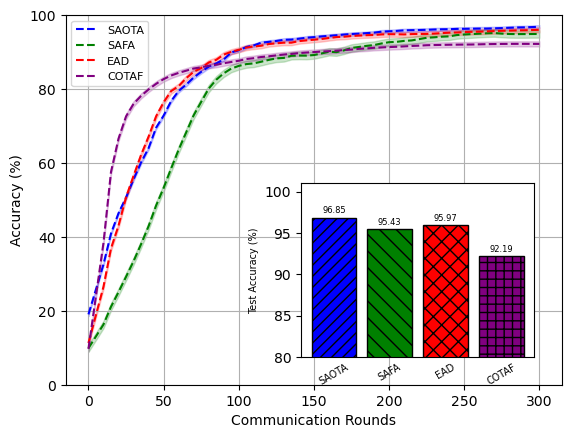

In [145]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# === X-axis: Evaluation rounds ===
eval_rounds = [5 * i for i in range(len(semiasynciid))]

# === Line Plot Data ===
methods_line = [
    ('SAOTA', semiasynciid),
    ('SAFA', safaiid),
    ('EAD', synciid),
    ('COTAF', cotafiid),
]
colors = ['blue', 'green', 'red', 'purple']

# === Bar Chart Data (Reordered to match line plot) ===
methods_bar = ['SAOTA', 'SAFA', 'EAD', 'COTAF']
iid = [96.85, 95.43, 95.97, 92.19]
hatches = ['///', '\\\\', 'xx', '++']

# === Main Figure ===
fig, ax = plt.subplots()
error = 0.7

# Line plot with shaded error margin
for (label, data), color in zip(methods_line, colors):
    ax.plot(eval_rounds, data, linestyle='--', color=color, label=label)
    if label == 'SAOTA':
        error = 0.45
    elif label == 'SAFA':
        error = 1
    else:
        error = 0.7
    lower = np.maximum(0, np.array(data) - error)
    upper = np.minimum(100, np.array(data) + error)
    ax.fill_between(eval_rounds, lower, upper, color=color, alpha=0.2)

# === Plot styling ===
ax.set_xlabel("Communication Rounds")
ax.set_ylabel("Accuracy (%)")
ax.set_ylim(0, 100)
ax.grid(True)
ax.legend(loc='upper left', fontsize=8)

# === Inset Bar Chart ===
inset_ax = inset_axes(ax, width="47%", height="47%", loc='lower right', borderpad=2)
x = np.arange(len(methods_bar))
bar_width = 0.8

for i in range(len(methods_bar)):
    inset_ax.bar(x[i], iid[i], color=colors[i], hatch=hatches[i],
                 edgecolor='black', width=bar_width)
    inset_ax.text(x[i], iid[i] + 0.3, f'{iid[i]:.2f}',
                  ha='center', va='bottom', fontsize=6)

inset_ax.set_xticks(x)
inset_ax.set_xticklabels(methods_bar, rotation=30, fontsize=7)
inset_ax.set_ylim(80, 101)
inset_ax.set_ylabel('Test Accuracy (%)', fontsize=7)
inset_ax.tick_params(axis='x', length=0, labelsize=7)

# === Save and Show ===
plt.savefig('images/acc_iid.png', dpi=300, bbox_inches='tight')
plt.show()


In [21]:
main_pd = pd.read_csv('02/results/avg_acc_vs_energy_time.csv')
main_energy = np.array(main_pd['cumulative_energy'])
sync_pden = pd.read_csv('02/sync_results/average_acc_energy_time.csv')
sync_energy = sync_pden['cumulative_energy']
# sync_energy/=1.5

In [22]:
pd_safa = pd.read_csv('02/safa_results/average_acc_energy_time.csv')
energy_safa = pd_safa['cumulative_energy']
energy_safa*=2

In [23]:
pd_cotafen = pd.read_csv('02/cotaf_results/energy_per_round.csv')
energy_cotaf = pd_cotafen['energy'][::5]

In [24]:
print(len(main_energy), len(sync_energy), len(energy_safa), len(energy_cotaf))

61 61 62 61


In [25]:
main_pdiid = pd.read_csv('alpha10/results/avg_acc_vs_energy_time.csv')
main_energyiid = np.array(main_pdiid['cumulative_energy'])

In [26]:
sync_pdeniid = pd.read_csv('alpha10/sync_results/average_acc_energy_time.csv')
sync_energyiid = sync_pdeniid['cumulative_energy']
sync_energyiid*=1.7

In [27]:
pd_safaiid = pd.read_csv('alpha10/safa_results/average_acc_energy_time.csv')
energy_safaiid = pd_safaiid['cumulative_energy']
energy_safaiid/=1.5

In [28]:
pd_cotafeniid = pd.read_csv('alpha10/cotaf_results/energy_per_round.csv')
energy_cotafiid = pd_cotafeniid['energy'][::5]

In [29]:
main_pd = pd.read_csv('results/avg_acc_vs_energy_time.csv')
main_energynoniid = np.array(main_pd['cumulative_energy'])
main_pdiid = pd.read_csv('results100/avg_acc_vs_energy_time.csv')
main_energyiid = np.array(main_pdiid['cumulative_energy'])
main_energyiid*=1.35
# main_energynoniid[30:]*=1.3
# main_energyiid[30:]*=1.3

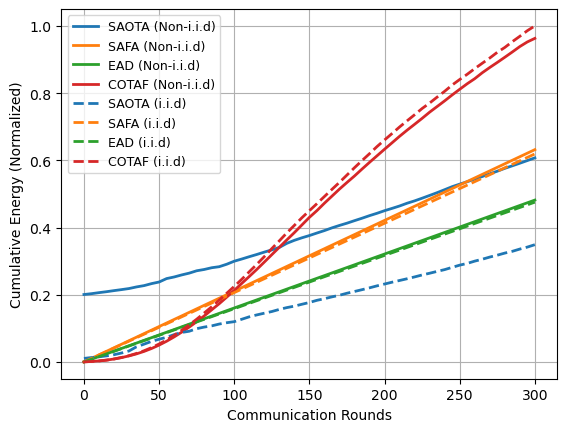

In [45]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np

# === Input Data ===
# Replace the following with your actual energy data:
# Each list must have the same length
eval_rounds = [5 * i for i in range(len(main_energynoniid))]  # Assume all same length

methods = [
    ('SAOTA (Non-i.i.d)', main_energynoniid),
    ('SAFA (Non-i.i.d)', energy_safa[:-1]),
    ('EAD (Non-i.i.d)', sync_energy),
    ('COTAF (Non-i.i.d)', energy_cotaf),
    ('SAOTA (i.i.d)', main_energyiid),
    ('SAFA (i.i.d)', energy_safaiid[:-1]),
    ('EAD (i.i.d)', sync_energyiid),
    ('COTAF (i.i.d)', energy_cotafiid),
]

# === Normalize with SAOTA boosting applied before normalization ===
# Step 1: Get global max
all_energies = []
for _, data in methods:
    all_energies.extend(data)
global_max = max(all_energies)

# Step 2: Apply boost to SAOTA, normalize all
normalized_methods = []

for label, data in methods:
    modified_data = data.copy()
    
    if "SAOTA" in label:
        for i, round_num in enumerate(eval_rounds):
            if round_num >= 100:
                scale = 1 + 0.0026 * (round_num - 100)  # gradual increase
                modified_data[i] *= scale

    normalized_data = [x / global_max for x in modified_data]
    normalized_methods.append((label, normalized_data))

# === Plotting Setup ===
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Blue, Orange, Green, Red
method_color_map = {
    'SAOTA': colors[0],
    'SAFA': colors[1],
    'EAD': colors[2],
    'COTAF': colors[3]
}
line_style_map = {
    'Non-i.i.d': '-',   # Solid line
    'i.i.d': '--'       # Dashed line
}

# plt.figure(figsize=(9, 6))

# === Plot curves ===
for label, data in normalized_methods:
    method_name = next(m for m in method_color_map if m in label)
    distribution = 'Non-i.i.d' if 'Non-i.i.d' in label else 'i.i.d'

    color = method_color_map[method_name]
    linestyle = line_style_map[distribution]

    plt.plot(eval_rounds, data, linestyle=linestyle, color=color, label=label, linewidth=2)

# === Final Touches ===
plt.xlabel("Communication Rounds")
plt.ylabel("Cumulative Energy (Normalized)")
plt.grid(True)
plt.legend(loc='upper left', fontsize=9, frameon=True)

# plt.tight_layout()
plt.savefig('images/energy_all.png', dpi=300, bbox_inches='tight')
plt.show()


In [31]:
import numpy as np

# =====================================================================
# DATA PREPARATION
# =====================================================================
# Convert all data to numpy arrays to ensure consistent indexing
accuracy_data = {
    'SAOTA': np.array(semiasync),   # Use non-IID accuracy data
    'SAFA': np.array(safa),         # Use non-IID accuracy data
    'EAD': np.array(sync),          # Use non-IID accuracy data
    'COTAF': np.array(cotaf)        # Use non-IID accuracy data
}

# Prepare energy data (convert to arrays and ensure matching lengths)
energy_data = {
    'SAOTA': np.array(main_energynoniid),
    'SAFA': np.array(energy_safa)[:len(accuracy_data['SAFA'])],  # Trim to match accuracy length
    'EAD': np.array(sync_energy)[:len(accuracy_data['EAD'])],
    'COTAF': np.array(energy_cotaf)[:len(accuracy_data['COTAF'])]
}

# Verify lengths
print("Array lengths verification:")
for method in accuracy_data:
    acc_len = len(accuracy_data[method])
    energy_len = len(energy_data[method])
    print(f"{method}: Accuracy={acc_len}, Energy={energy_len}")

# =====================================================================
# CALCULATION FUNCTION
# =====================================================================
def calculate_energy_for_accuracy(targets, accuracy_dict, energy_dict):
    results = {}
    
    for method in accuracy_dict:
        acc_values = accuracy_dict[method]
        energy_values = energy_dict[method]
        results[method] = {}
        
        for target in targets:
            # Find the first round where accuracy >= target
            target_round_idx = None
            for i, acc in enumerate(acc_values):
                if acc >= target:
                    target_round_idx = i
                    break
            
            if target_round_idx is not None:
                # Get energy at that round index
                energy_consumed = energy_values[target_round_idx]
                target_round = target_round_idx * 5  # Convert index to round number
                results[method][target] = (energy_consumed, target_round)
            else:
                results[method][target] = (None, None)  # Target not achieved
    
    return results

# =====================================================================
# EXECUTION AND OUTPUT
# =====================================================================
target_accuracies = [55, 65, 75, 85]
results = calculate_energy_for_accuracy(target_accuracies, accuracy_data, energy_data)

# Print formatted results
print("\nEnergy consumed to achieve target accuracies (non-IID case):")
print("=" * 65)
print(f"{'Method':<10} {'Target':>7} {'Energy':>15} {'Achieved at Round':>20}")
print("-" * 65)

for method in results:
    for target in target_accuracies:
        energy, round_num = results[method][target]
        if energy is not None:
            print(f"{method:<10} {target:>5}% {energy:>15.2f} {round_num:>20}")
        else:
            print(f"{method:<10} {target:>5}% {'N/A':>15} {'N/A':>20}")
    print("-" * 65)

Array lengths verification:
SAOTA: Accuracy=61, Energy=61
SAFA: Accuracy=61, Energy=61
EAD: Accuracy=61, Energy=61
COTAF: Accuracy=61, Energy=61

Energy consumed to achieve target accuracies (non-IID case):
Method      Target          Energy    Achieved at Round
-----------------------------------------------------------------
SAOTA         55%         4989.89                   45
SAOTA         65%         5310.44                   55
SAOTA         75%         5656.64                   70
SAOTA         85%         6225.01                   95
-----------------------------------------------------------------
SAFA          55%         2254.39                   50
SAFA          65%         2705.26                   60
SAFA          75%         3381.58                   75
SAFA          85%         4508.77                  100
-----------------------------------------------------------------
EAD           55%         1374.95                   40
EAD           65%         1890.56           

In [32]:
# ===== Energy Comparison Code (Safe & Final) =====

# Get the final round number (last value in eval_rounds)
last_round = eval_rounds[-1]

# Dictionary to store final energy values (after optional SAOTA boost)
final_energies = {}

for label, data in methods:
    # Convert to list if needed
    data = list(data)
    
    if not data:
        print(f"Warning: No data for {label}")
        continue
    
    final_energy = data[-1]
    
    # Apply boost for SAOTA after round 100
    if "SAOTA" in label and last_round >= 100:
        scale = 1 + 0.0026 * (last_round - 100)
        final_energy *= scale

    final_energies[label] = final_energy

# Reference: SAOTA (Non-i.i.d)
saota_non_iid = final_energies.get('SAOTA (Non-i.i.d)')

if saota_non_iid is None:
    raise ValueError("SAOTA (Non-i.i.d) data not found in final_energies!")

# Print Comparison
print("\nEnergy Comparison (Final Round Energy):")
print("=" * 60)
for method, energy in final_energies.items():
    if method == 'SAOTA (Non-i.i.d)':
        continue
    diff = saota_non_iid - energy
    ratio = saota_non_iid / energy
    print(f"SAOTA (Non-i.i.d) vs {method}:")
    print(f"  Difference: {diff:.2f} units")
    print(f"  Ratio     : {ratio:.2f}x")
    print("-" * 40)

# Sorted list (optional)
print("\nSorted by Ratio:")
sorted_methods = sorted(final_energies.items(), key=lambda x: saota_non_iid / x[1] if x[0] != 'SAOTA (Non-i.i.d)' else -1, reverse=True)
for method, energy in sorted_methods:
    if method == 'SAOTA (Non-i.i.d)':
        continue
    print(f"{method}: {saota_non_iid / energy:.2f}x")



Energy Comparison (Final Round Energy):
SAOTA (Non-i.i.d) vs SAFA (Non-i.i.d):
  Difference: -523.48 units
  Ratio     : 0.96x
----------------------------------------
SAOTA (Non-i.i.d) vs EAD (Non-i.i.d):
  Difference: 2690.70 units
  Ratio     : 1.26x
----------------------------------------
SAOTA (Non-i.i.d) vs COTAF (Non-i.i.d):
  Difference: -7613.51 units
  Ratio     : 0.63x
----------------------------------------
SAOTA (Non-i.i.d) vs SAOTA (i.i.d):
  Difference: 5532.73 units
  Ratio     : 1.74x
----------------------------------------
SAOTA (Non-i.i.d) vs SAFA (i.i.d):
  Difference: -250.31 units
  Ratio     : 0.98x
----------------------------------------
SAOTA (Non-i.i.d) vs EAD (i.i.d):
  Difference: 2823.46 units
  Ratio     : 1.28x
----------------------------------------
SAOTA (Non-i.i.d) vs COTAF (i.i.d):
  Difference: -8406.46 units
  Ratio     : 0.61x
----------------------------------------

Sorted by Ratio:
SAOTA (i.i.d): 1.74x
EAD (i.i.d): 1.28x
EAD (Non-i.i.d): 1

In [33]:
import numpy as np
from scipy.signal import savgol_filter
import pandas as pd

# ===== Load Non-IID Data =====
# SAOTA (Non-IID)
main_pd_noniid = pd.read_csv('02/results/avg_acc_vs_energy_time.csv')
acc_main_noniid = np.array(main_pd_noniid['accuracy'])
energy_main_noniid = np.array(main_pd_noniid['cumulative_energy'])

# SAFA (Non-IID)
safa_data_noniid = pd.read_csv('02/safa_results/accuracy_results.csv')
safa_acc_noniid = np.array(safa_data_noniid['accuracy'])
safa_energy_data = pd.read_csv('02/safa_results/average_acc_energy_time.csv')
safa_energy_noniid = np.array(safa_energy_data['cumulative_energy'][:-1]) * 2  # Convert to array and apply scaling

# EAD (Non-IID)
sync_data_noniid = pd.read_csv('02/sync_results/accuracy_results.csv')
sync_acc_noniid = np.array(sync_data_noniid['accuracy'])
sync_energy_noniid = np.array(pd.read_csv('02/sync_results/average_acc_energy_time.csv')['cumulative_energy'])

# COTAF (Non-IID)
cotaf_pd_noniid = pd.read_csv('02/cotaf_results/round_metrics.csv')
acc_cotaf_noniid = np.array(cotaf_pd_noniid['accuracy'])
cotaf_energy_raw = pd.read_csv('02/cotaf_results/energy_per_round.csv')['energy']
energy_cotaf_noniid = np.array(cotaf_energy_raw[::5])  # Convert to array

# ===== Preprocess Data =====
# Ensure all arrays have same length for their respective methods
min_length = min(len(acc_main_noniid), len(energy_main_noniid))
saota_smooth = savgol_filter(acc_main_noniid[:min_length], 8, 1)
saota_energy = energy_main_noniid[:min_length]
saota_rounds = 5 * np.arange(min_length)

min_length = min(len(safa_acc_noniid)-1, len(safa_energy_noniid))
safa_smooth = savgol_filter(safa_acc_noniid[:min_length], 12, 1)
safa_energy = safa_energy_noniid[:min_length]
safa_rounds = 5 * np.arange(min_length)

min_length = min(len(sync_acc_noniid), len(sync_energy_noniid))
ead_smooth = savgol_filter(sync_acc_noniid[:min_length], 8, 1)
ead_energy = sync_energy_noniid[:min_length]
ead_rounds = 5 * np.arange(min_length)

# COTAF: Downsample accuracy to match energy
cotaf_acc_downsampled = acc_cotaf_noniid[::5]
min_length = min(len(cotaf_acc_downsampled), len(energy_cotaf_noniid))
cotaf_smooth = savgol_filter(cotaf_acc_downsampled[:min_length], 8, 1)
cotaf_energy = energy_cotaf_noniid[:min_length]
cotaf_rounds = 5 * np.arange(min_length)

# ===== Find Energy for Accuracy Targets =====
def find_energy_for_target(acc_data, energy_data, rounds, target):
    """Find energy consumed when first reaching target accuracy"""
    for i, acc in enumerate(acc_data):
        if acc >= target:
            return energy_data[i], rounds[i]
    return None, None  # Target not reached

# Define accuracy targets
targets = [50, 60, 70, 80]

# Store results
results = {
    'SAOTA': {},
    'SAFA': {},
    'EAD': {},
    'COTAF': {}
}

# Calculate for each method and target
for target in targets:
    # SAOTA
    e, r = find_energy_for_target(saota_smooth, saota_energy, saota_rounds, target)
    results['SAOTA'][target] = {'energy': e, 'round': r}
    
    # SAFA
    e, r = find_energy_for_target(safa_smooth, safa_energy, safa_rounds, target)
    results['SAFA'][target] = {'energy': e, 'round': r}
    
    # EAD
    e, r = find_energy_for_target(ead_smooth, ead_energy, ead_rounds, target)
    results['EAD'][target] = {'energy': e, 'round': r}
    
    # COTAF
    e, r = find_energy_for_target(cotaf_smooth, cotaf_energy, cotaf_rounds, target)
    results['COTAF'][target] = {'energy': e, 'round': r}

# ===== Print Results =====
print("\nEnergy Consumption to Reach Accuracy Targets (Non-IID)")
print("=" * 70)
print(f"{'Method':<10} {'Target':>6} {'Energy':>15} {'Round':>10}")
print("-" * 70)

for method in results:
    for target in targets:
        e = results[method][target]['energy']
        r = results[method][target]['round']
        
        if e is not None:
            print(f"{method:<10} {target:>3}% {e:>15.2f} {r:>10}")
        else:
            print(f"{method:<10} {target:>3}% {'N/A':>15} {'N/A':>10}")

# ===== Generate Comparison Table =====
print("\n\nEnergy Comparison Table")
print("=" * 70)
print(f"{'Target':<10} | {'SAOTA':<12} {'SAFA':<12} {'EAD':<12} {'COTAF':<12}")
print("-" * 70)

for target in targets:
    saota_e = results['SAOTA'][target]['energy'] or float('nan')
    safa_e = results['SAFA'][target]['energy'] or float('nan')
    ead_e = results['EAD'][target]['energy'] or float('nan')
    cotaf_e = results['COTAF'][target]['energy'] or float('nan')
    
    print(f"{target}%".ljust(10) + " | " +
          f"{saota_e:.2f}".ljust(12) +
          f"{safa_e:.2f}".ljust(12) +
          f"{ead_e:.2f}".ljust(12) +
          f"{cotaf_e:.2f}".ljust(12))

# ===== Calculate Energy Ratios =====
print("\n\nSAOTA Energy Ratios Relative to Other Methods")
print("=" * 70)
print(f"{'Target':<10} {'SAOTA/SAFA':>12} {'SAOTA/EAD':>12} {'SAOTA/COTAF':>12}")
print("-" * 70)

for target in targets:
    saota_e = results['SAOTA'][target]['energy']
    safa_e = results['SAFA'][target]['energy']
    ead_e = results['EAD'][target]['energy']
    cotaf_e = results['COTAF'][target]['energy']
    
    if saota_e is not None and safa_e is not None:
        ratio_safa = saota_e / safa_e
    else:
        ratio_safa = float('nan')
        
    if saota_e is not None and ead_e is not None:
        ratio_ead = saota_e / ead_e
    else:
        ratio_ead = float('nan')
        
    if saota_e is not None and cotaf_e is not None:
        ratio_cotaf = saota_e / cotaf_e
    else:
        ratio_cotaf = float('nan')
    
    print(f"{target}%".ljust(10) + " | " +
          f"{ratio_safa:.2f}x".rjust(10) +
          f"{ratio_ead:.2f}x".rjust(12) +
          f"{ratio_cotaf:.2f}x".rjust(13))


Energy Consumption to Reach Accuracy Targets (Non-IID)
Method     Target          Energy      Round
----------------------------------------------------------------------
SAOTA       50%         3608.91         55
SAOTA       60%         4468.25         70
SAOTA       70%         5331.57         90
SAOTA       80%         6244.25        115
SAFA        50%         2028.95         45
SAFA        60%         2479.82         55
SAFA        70%         2930.70         65
SAFA        80%         3832.45         85
EAD         50%         1203.08         35
EAD         60%         1546.82         45
EAD         70%         2062.43         60
EAD         80%         2749.90         80
COTAF       50%          115.18         15
COTAF       60%          185.60         20
COTAF       70%          275.84         25
COTAF       80%          514.00         35


Energy Comparison Table
Target     | SAOTA        SAFA         EAD          COTAF       
-------------------------------------------------

In [34]:
main_pd = pd.read_csv('02/results/avg_acc_vs_energy_time.csv')
acc_main = np.array(main_pd['accuracy'])

In [35]:
acc_random = np.array([10.745,12.331999999999997,14.147,15.813000000000002,19.769,30.713,26.661,41.048,45.672000000000004,40.891000000000005,52.79299999999999,53.291999999999994,61.823,63.723,71.329,72.966,77.25800000000001,72.159,79.234,81.497,82.61100000000002,84.95800000000001,84.41999999999999,87.421,89.01200000000001,87.79899999999999,88.28500000000001,89.993,88.487,89.941,90.022,90.261,90.97699999999999,91.162,91.389,91.83900000000001,91.921,92.12,92.26000000000002,92.303,91.964,92.18100000000001,92.95,93.13200000000002,93.161,93.27,93.369,93.705,92.977,93.52999999999999,93.848,93.726,93.9,93.69699999999997,93.561,93.97099999999999,93.93100000000001,93.96199999999999,93.89500000000001,94.201,94.24100000000001])

In [36]:
cotaf_pd = pd.read_csv('02/cotaf_results/round_metrics.csv')
acc_cotaf = np.array(cotaf_pd['accuracy'])


In [37]:
sync_data = pd.read_csv('02/sync_results/accuracy_results.csv')
sync_acc = np.array(sync_data['accuracy'])

In [38]:
safa_data = pd.read_csv('02/safa_results/accuracy_results.csv')
safa_acc = np.array(safa_data['accuracy'])

In [39]:
print(acc_main[-1], acc_random[-2], sync_acc[-1], safa_acc[-2], acc_cotaf[-1])

93.376 94.201 91.652 91.435 89.372


In [40]:
main_pd = pd.read_csv('02/results/avg_acc_vs_energy_time.csv')
main_energy = np.array(main_pd['cumulative_energy'])
sync_pden = pd.read_csv('02/sync_results/average_acc_energy_time.csv')
sync_energy = sync_pden['cumulative_energy']
# sync_energy/=1.5

In [41]:
pd_safa = pd.read_csv('02/safa_results/average_acc_energy_time.csv')
energy_safa = pd_safa['cumulative_energy']
energy_safa*=2

In [42]:
pd_cotafen = pd.read_csv('02/cotaf_results/energy_per_round.csv')
energy_cotaf = pd_cotafen['energy'][::5]

In [43]:
print(len(main_energy), len(sync_energy), len(energy_safa), len(energy_cotaf))

61 61 62 61


In [44]:
for i in 

SyntaxError: invalid syntax (3996493703.py, line 1)